In [1]:
import numpy as np
from numpy import vectorize, random
from scipy import integrate, stats
from matplotlib import pylab as plt

In [2]:
@vectorize
def f(x):
    return (x ** 2 + 1) / (x ** 4 + 1)

@vectorize
def g(x):
    return - (1 / x ** 2 + 1) / (1 / x ** 4 + 1) / x ** 2 

In [3]:
a = 0
b = np.inf
pre_calc = integrate.quad(f, a, b)[0]

In [4]:
def calculate_integral(integrand, data, distr):
    return np.sum(integrand(data) / distr(data)) / len(data)

@vectorize
def calculate_first1(n=10**4):
    return calculate_integral(f, stats.uniform.rvs(size=n), stats.uniform.pdf)

@vectorize
def calculate_first2(n=10**4):
    return calculate_integral(g, stats.uniform.rvs(size=n), stats.uniform.pdf)

@vectorize
def calculate_first(n=10**4):
    return calculate_first1(n) - calculate_first2(n)

In [5]:
ns = np.array([100,250,500,1000,2000,3000,4000,5000,10000,15000,20000,25000,50000])
results = calculate_first(ns)

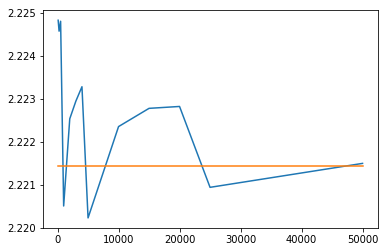

In [6]:
plt.plot(ns, results)
plt.plot(ns, [pre_calc] * len(ns))
plt.show()

In [13]:
def l(x, y):
    return np.exp(-(x ** 2 + y ** 2) / 2) * np.log(1 + (x / y) ** 2)

def t(v):
    x = v[:,0]
    y = v[:,1]
    rv = stats.multivariate_normal([0,0], [[1, 0], [0, 1]])
    return l(x, y) * rv.pdf(v) * 4 * np.pi

@vectorize
def calculate_second(n=10**6):
    rv = stats.multivariate_normal([0,0], [[1, 0], [0, 1]])
    return calculate_integral(t, rv.rvs(size=n), rv.pdf)

In [16]:
result = integrate.dblquad(l, -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)[0]

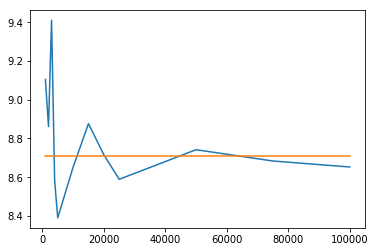

In [37]:
ns = np.array([1000,2000,3000,4000,5000,10000,15000,20000,25000,50000,75000,100000])
results = calculate_second(ns)
plt.plot(ns, results)
plt.plot(ns, [result] * len(ns))
plt.show()